In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Loading data set
df = pd.read_csv('https://raw.githubusercontent.com/tmckenzieii/team_43/main/data/food_access.csv')

In [ ]:
# Testing to 'see' data
df.head(10)

In [ ]:
# Create combined column for population at both distances
df['combined_low_inc_acc'] = df['lalowihalf'] + df['lalowi1']

# Drop NaN values
df['combined_low_inc_acc'].dropna()

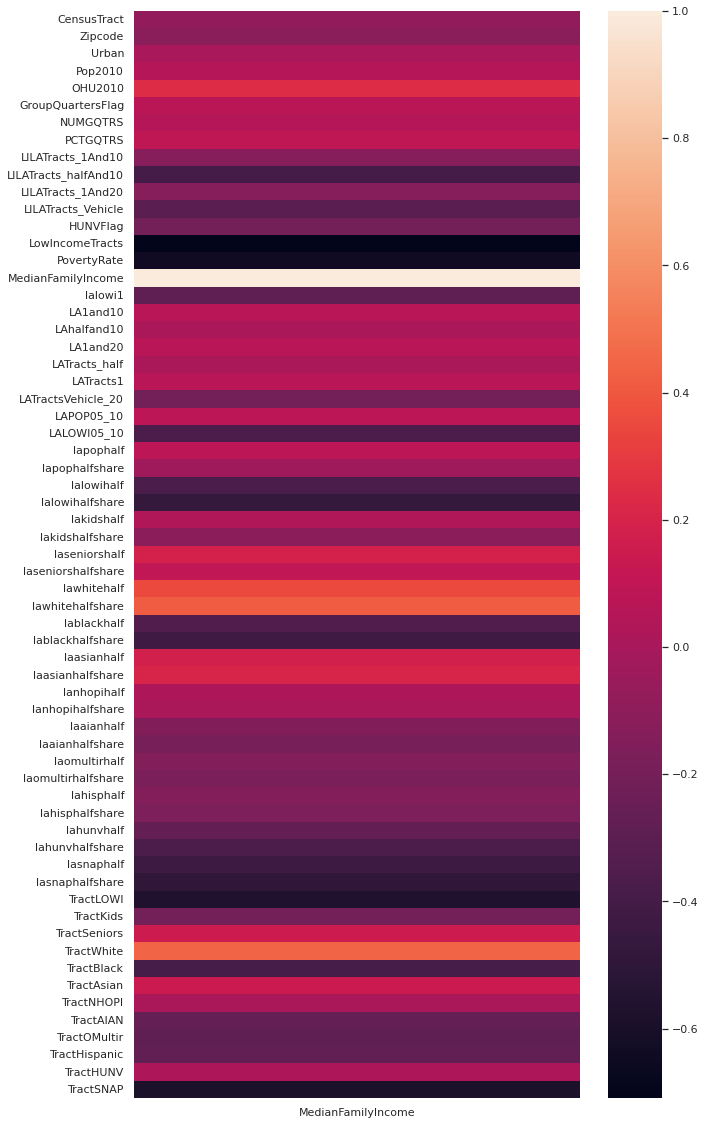

In [4]:
# Variable for correlation matrix
corr_mat = df.corr()
# Variable for median income column
x = corr_mat[['MedianFamilyIncome']]
# Setting figure size for readability
sns.set(rc = {'figure.figsize':(10,20)})
# Heat map correlation
sns.heatmap(x)
# Finding columns where correlation > .8
#corr_mat.loc[np.where(corr_mat>0.8, 1, 0)==1].columns

In [ ]:
# Correlation between 'median income' and 'low access/income pop at 1/2 mile distance'
#df['MedianFamilyIncome'].corr(df['lalowihalf']) # -.37 correlation

# Correlation between 'median income' and 'low access/income pop at 1 mile distance'
#df['MedianFamilyIncome'].corr(df['lalowi1']) # -.28 correlation

# Correlation between 'median income' and 'combined low income/access pops at both distances'
#df['MedianFamilyIncome'].corr(df['combined_low_inc_acc']) # -.52 correlation

# Plotting correlation between 'median income' and 'low access/income pop at 1/2 mile distance'
#df.plot.scatter(x = 'MedianFamilyIncome', y = 'lalowihalf')

# Plotting correlation between 'median income' and 'low access/income pop at 1 mile distance'
#df.plot.scatter(x = 'MedianFamilyIncome', y = 'lalowi1')

# Plotting correlation between 'median income' and 'combined low income/access pops at both distances'
# s_plot = df.plot.scatter(x = 'MedianFamilyIncome', y = 'combined_low_inc_acc', figsize=(7,5))
# s_plot.set_xlabel("Median Family Income")
# s_plot.set_ylabel("Low Income/Access at 1/2 & 1 Miles")

In [ ]:
# Correlation between 'poverty rate' and 'low access/income pop at 1/2 mile distance'
#df['PovertyRate'].corr(df['lalowihalf']) # .31 correlation

# Correlation between 'poverty rate' and 'low access/income pop at 1 mile distance'
#df['PovertyRate'].corr(df['lalowi1']) # .35 correlation

# Correlation between 'poverty rate' and 'combined low income/access pops at both distances'
#df['PovertyRate'].corr(df['combined_low_inc_acc']) # .54 correlation

# Plotting correlation between 'poverty rate' and 'low access/income pop at 1/2 mile distance'
#df.plot.scatter(x = 'PovertyRate', y = 'lalowihalf')

# Plotting correlation between 'poverty rate' and 'low access/income pop at 1 mile distance'
#df.plot.scatter(x = 'PovertyRate', y = 'lalowi1')

# Plotting correlation between 'poverty rate' and 'combined low income/access pops at both distances'
s_plot2 = df.plot.scatter(x = 'PovertyRate', y = 'combined_low_inc_acc', figsize=(7,5))
s_plot2.set_xlabel("Tract Poverty Rate")
s_plot2.set_ylabel("Low Income/Access Populations at 1/2 & 1 Miles")

In [ ]:
# Grouping df by zip code
df_zip = df.groupby('Zipcode').median()

# Reseting index for plotting
df_zip = df_zip.reset_index()

# Test
df_zip

In [ ]:
df.groupby('Zipcode')['MedianFamilyIncome'].median()

In [ ]:
# Plotting median income by zipcode
#df_zip.plot.bar(x= 'Zipcode', y= 'MedianFamilyIncome', rot= 90, figsize=(30, 5))
zip_income = df.boxplot(column=['MedianFamilyIncome'], by=['Zipcode'], rot=90, figsize=(20,10))
zip_income.set_ylabel('Median Family Income within Tracts')
zip_income.set_xlabel('Cook County Zipcodes')

In [ ]:
# Plotting low income/access population at 1 mile distance by zipcode
df_zip.plot.bar(x= 'Zipcode', y= 'lalowi1', rot= 90, figsize=(20, 5))

In [ ]:
# Plotting low income/access population at 1/2 mile distance by zipcode
df_zip.plot.bar(x= 'Zipcode', y= 'lalowihalf', rot= 90, figsize=(20, 5))

In [ ]:
# Plotting low income/access population at both distances by zipcode
#df_zip.plot.bar(x= 'Zipcode', y= 'combined_low_inc_acc', rot= 90, figsize=(30, 5))
zip_access_inc = df.boxplot(column=['combined_low_inc_acc'], by=['Zipcode'], rot=90, figsize=(20,10))
zip_access_inc.set_ylabel('Low Income/Access Populations within Tracts')
zip_access_inc.set_xlabel('Cook County Zipcodes')
#bplot.suptitle('Cook County Median Income by Zipcode')

Text(0.5, 0, 'Cook County Zipcodes')

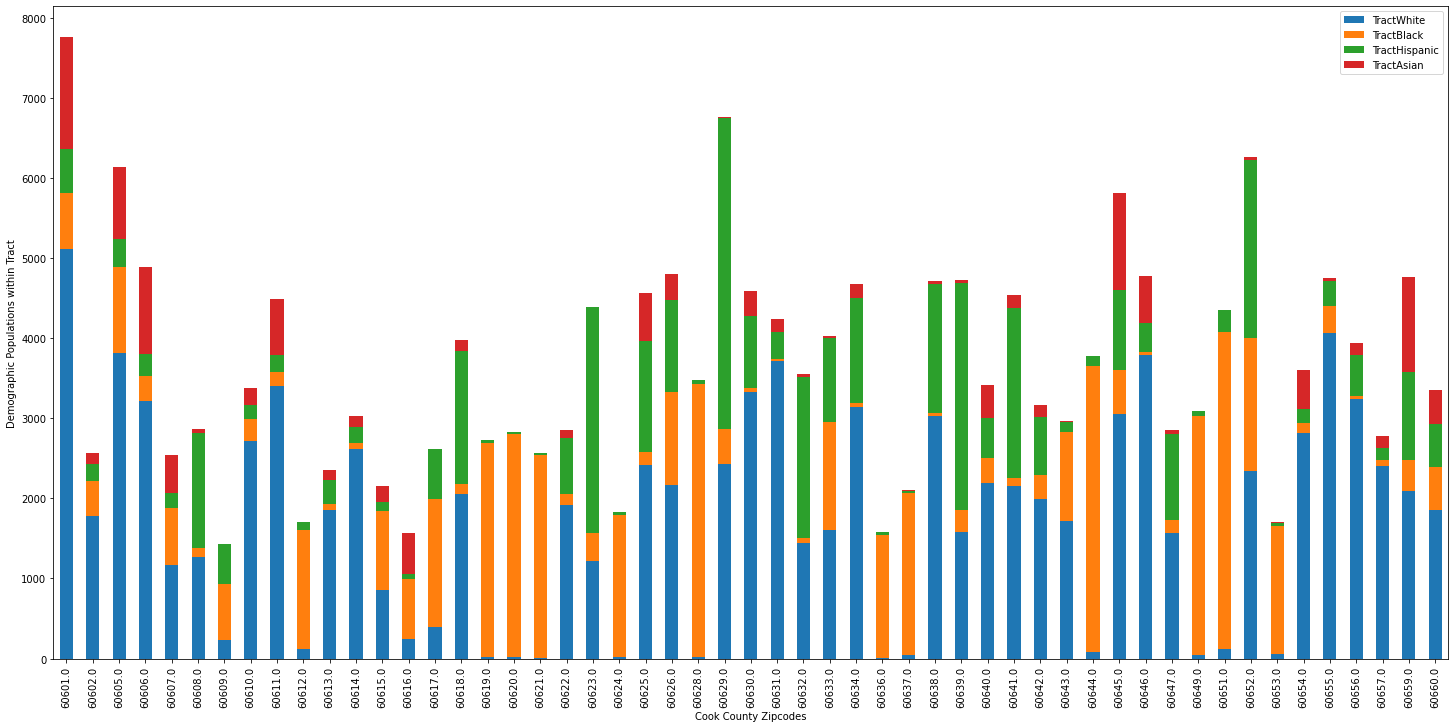

In [ ]:
stack_bar = df_zip[['Zipcode', 'TractWhite', 'TractBlack', 'TractHispanic', 'TractAsian']].plot(x='Zipcode', kind='bar', stacked=True, rot= 90, figsize=(25, 12))
stack_bar.set_ylabel('Demographic Populations within Tract')
stack_bar.set_xlabel('Cook County Zipcodes')